In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = "API_SP.POP.TOTL_DS2_en_csv_v2_300577.csv"
data = pd.read_csv(file_path, skiprows=4)
print(data.head())

                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54608.0      55811.0      56682.0      57475.0      58178.0   
1  130692579.0  134169237.0  137835590.0  141630546.0  145605995.0   
2    8622466.0    8790140.0    8969047.0    9157465.0    9355514.0   
3   97256290.0   99314028.0  101445032.0  103667517.0  105959979.0   
4    5357195.0    5441333.0    5521400.0    5599827.0    5673199.0   

          1965  ...         2015         2016         2017         2018  \
0      58782.0  .

In [3]:
print("Unique Country Names:\n", data['Country Name'].unique())

print("Unique Indicator Names:\n", data['Indicator Name'].unique())

Unique Country Names:
 ['Aruba' 'Africa Eastern and Southern' 'Afghanistan'
 'Africa Western and Central' 'Angola' 'Albania' 'Andorra' 'Arab World'
 'United Arab Emirates' 'Argentina' 'Armenia' 'American Samoa'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Azerbaijan' 'Burundi'
 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain'
 'Bahamas, The' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda'
 'Bolivia' 'Brazil' 'Barbados' 'Brunei Darussalam' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Central Europe and the Baltics'
 'Switzerland' 'Channel Islands' 'Chile' 'China' "Cote d'Ivoire"
 'Cameroon' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Colombia' 'Comoros'
 'Cabo Verde' 'Costa Rica' 'Caribbean small states' 'Cuba' 'Curacao'
 'Cayman Islands' 'Cyprus' 'Czechia' 'Germany' 'Djibouti' 'Dominica'
 'Denmark' 'Dominican Republic' 'Algeria'
 'East Asia & Pacific (excluding high income)'
 'Early-demographic dividend' 'East Asia & Pacific'
 'Europe & Central Asia (excludi

In [11]:
#specific indicator
country_name = 'India'  
indicator_name = 'Population, total'  

In [12]:
#filter the data for specific country and indicator
filtered_data = data[(data['Country Name'] == country_name) & (data['Indicator Name'] == indicator_name)]

print(filtered_data)

    Country Name Country Code     Indicator Name Indicator Code         1960  \
109        India          IND  Population, total    SP.POP.TOTL  445954579.0   

            1961         1962         1963         1964         1965  ...  \
109  456351876.0  467024193.0  477933619.0  489059309.0  500114346.0  ...   

             2015          2016          2017          2018          2019  \
109  1.322867e+09  1.338636e+09  1.354196e+09  1.369003e+09  1.383112e+09   

             2020          2021          2022  2023  Unnamed: 68  
109  1.396387e+09  1.407564e+09  1.417173e+09   NaN          NaN  

[1 rows x 69 columns]


In [13]:
#melt dataframe to get year as a seperate column
melted_data = filtered_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                                 var_name='Year', value_name='Value')

print(melted_data)


   Country Name Country Code     Indicator Name Indicator Code         Year  \
0         India          IND  Population, total    SP.POP.TOTL         1960   
1         India          IND  Population, total    SP.POP.TOTL         1961   
2         India          IND  Population, total    SP.POP.TOTL         1962   
3         India          IND  Population, total    SP.POP.TOTL         1963   
4         India          IND  Population, total    SP.POP.TOTL         1964   
..          ...          ...                ...            ...          ...   
60        India          IND  Population, total    SP.POP.TOTL         2020   
61        India          IND  Population, total    SP.POP.TOTL         2021   
62        India          IND  Population, total    SP.POP.TOTL         2022   
63        India          IND  Population, total    SP.POP.TOTL         2023   
64        India          IND  Population, total    SP.POP.TOTL  Unnamed: 68   

           Value  
0   4.459546e+08  
1   4.563519e

In [14]:
#convert year column to numeric
melted_data['Year'] = pd.to_numeric(melted_data['Year'], errors='coerce')

print(melted_data)

   Country Name Country Code     Indicator Name Indicator Code    Year  \
0         India          IND  Population, total    SP.POP.TOTL  1960.0   
1         India          IND  Population, total    SP.POP.TOTL  1961.0   
2         India          IND  Population, total    SP.POP.TOTL  1962.0   
3         India          IND  Population, total    SP.POP.TOTL  1963.0   
4         India          IND  Population, total    SP.POP.TOTL  1964.0   
..          ...          ...                ...            ...     ...   
60        India          IND  Population, total    SP.POP.TOTL  2020.0   
61        India          IND  Population, total    SP.POP.TOTL  2021.0   
62        India          IND  Population, total    SP.POP.TOTL  2022.0   
63        India          IND  Population, total    SP.POP.TOTL  2023.0   
64        India          IND  Population, total    SP.POP.TOTL     NaN   

           Value  
0   4.459546e+08  
1   4.563519e+08  
2   4.670242e+08  
3   4.779336e+08  
4   4.890593e+08

In [15]:
#melted data to drop NaN
melted_data.dropna(subset=['Year', 'Value'], inplace=True)

print(melted_data)

   Country Name Country Code     Indicator Name Indicator Code    Year  \
0         India          IND  Population, total    SP.POP.TOTL  1960.0   
1         India          IND  Population, total    SP.POP.TOTL  1961.0   
2         India          IND  Population, total    SP.POP.TOTL  1962.0   
3         India          IND  Population, total    SP.POP.TOTL  1963.0   
4         India          IND  Population, total    SP.POP.TOTL  1964.0   
..          ...          ...                ...            ...     ...   
58        India          IND  Population, total    SP.POP.TOTL  2018.0   
59        India          IND  Population, total    SP.POP.TOTL  2019.0   
60        India          IND  Population, total    SP.POP.TOTL  2020.0   
61        India          IND  Population, total    SP.POP.TOTL  2021.0   
62        India          IND  Population, total    SP.POP.TOTL  2022.0   

           Value  
0   4.459546e+08  
1   4.563519e+08  
2   4.670242e+08  
3   4.779336e+08  
4   4.890593e+08

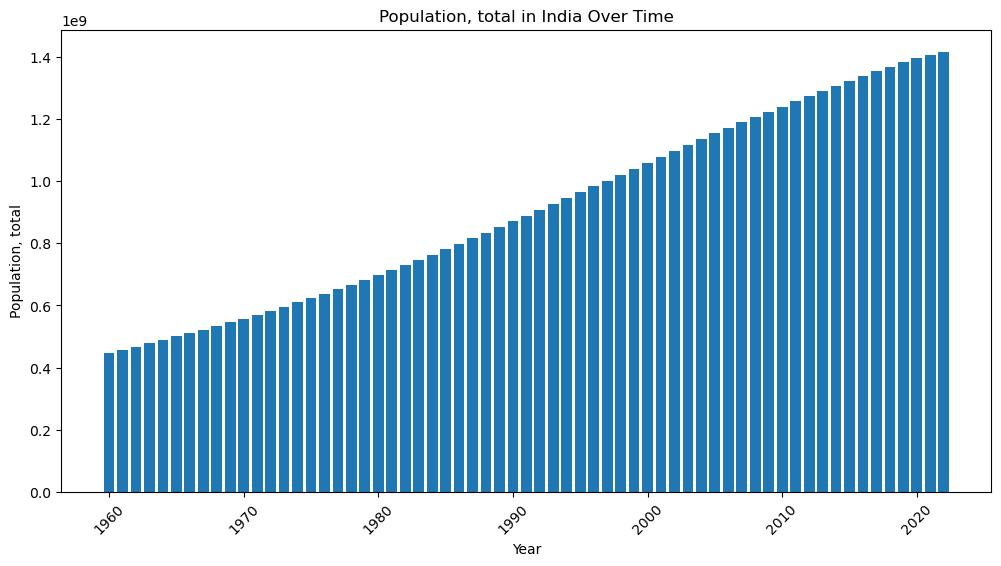

In [16]:
#Plot the figure
plt.figure(figsize=(12, 6))
plt.bar(melted_data['Year'], melted_data['Value'])
plt.xlabel('Year')
plt.ylabel(indicator_name)
plt.title(f'{indicator_name} in {country_name} Over Time')
plt.xticks(rotation=45)
plt.show()